<a href="https://colab.research.google.com/github/gowtham2001/Python-Programs/blob/main/IPL%20Analysis%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/matches.csv")
df.shape
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [ ]:
df['player_of_match'].fillna('noplayer',inplace=True)

In [ ]:
df['city'].fillna('nocity',inplace=True)

In [ ]:
df['winner'].fillna('no',inplace=True)

In [ ]:
df['umpire1'].fillna('noumpire1',inplace=True)

In [ ]:
df['umpire2'].fillna('noumpire2',inplace=True)

In [ ]:
df['umpire3'].fillna('noumpire3',inplace=True)

In [ ]:
df.isna().sum().sum()

0

Text(0.5, 1.0, 'Player of match')

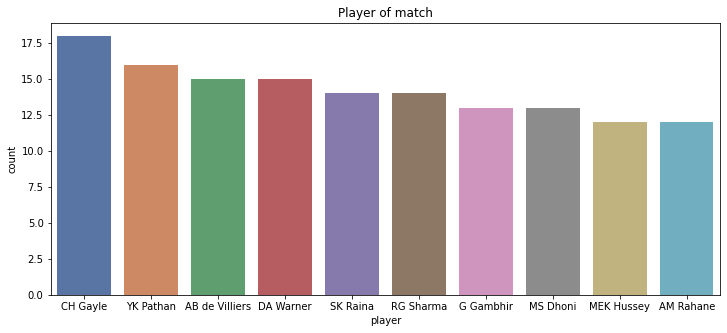

In [ ]:
plt.figure(figsize=(12,5))
fil=df['player_of_match'].value_counts().iloc[:10]
ax=sns.barplot(x=fil.index,y=fil.values,data=df)
ax.set(xlabel='player',ylabel='count')
ax.set_title('Player of match')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

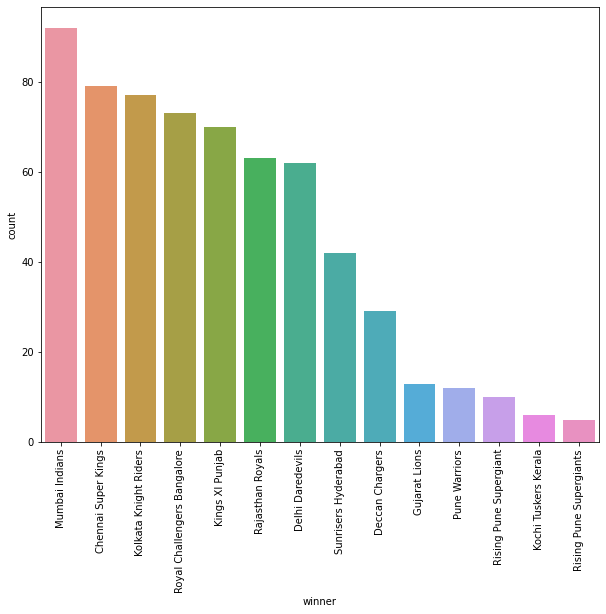

In [ ]:
fil=df[df['winner']!='no']
plt.figure(figsize=(10,8))
fil1=fil['winner'].value_counts().index
sns.countplot(x='winner',order=fil1,data=df)
plt.xticks(rotation=90)


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

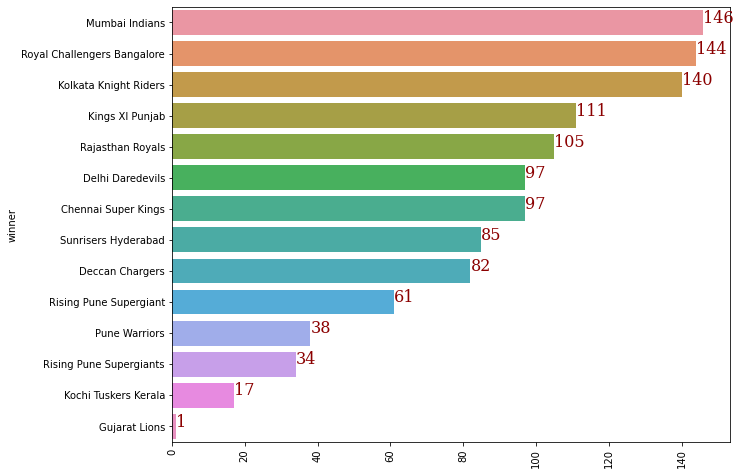

In [ ]:
fil=df[df['winner']!='no']
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize=(10,8))
fil1=fil.groupby(['winner'])['win_by_runs'].max().sort_values(ascending=False)
sns.barplot(y=fil1.index,x=fil1.values,data=df)
for index, value in enumerate(fil1.values):
    plt.text(value, index, str(value),fontdict=font)
plt.xticks(rotation=90)

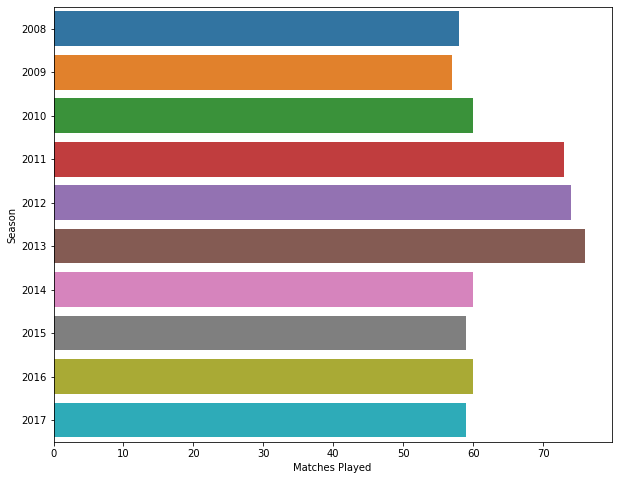

In [ ]:
plt.figure(figsize=(10,8))
data = df.groupby(['id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

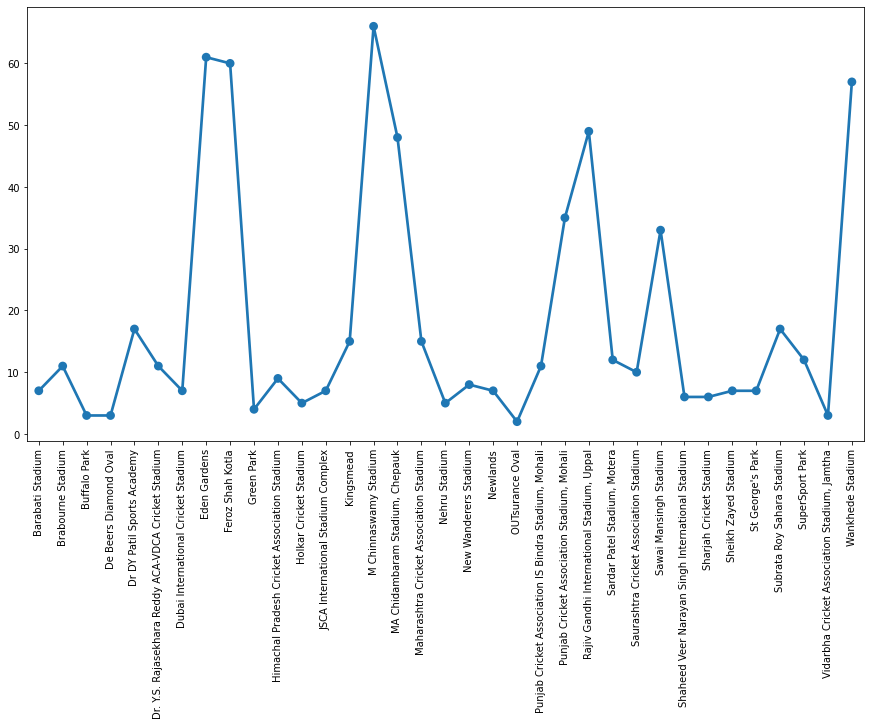

In [ ]:
plt.figure(figsize=(15,8))
data=df.groupby(['id','venue']).count().index.droplevel(level=0).value_counts().sort_index()
sns.pointplot(x=data.index,y=data.values,data=df)
plt.xticks(rotation=90)